In [1]:
import numpy as np
import pandas as pd

## Investment statistics

In [2]:
investment_df = pd.read_csv("datasets/all_investments_2001_2023.csv")

In [3]:
investment_df.isna().sum()

Unnamed: 0                                              0
Investee Company Name                                   1
Investee Company Nation                                55
Investee Company TRBC Economic Sector                  85
Investment Date                                         1
Round Number                                            1
Investment Stage                                        7
Firm Investor Name                                      1
Fund Investor Name                                      1
Investor Equity Total\n(USD, Millions)                  1
Disclosed Fund Equity Contribution\n(USD, Millions)     1
Round Equity Total\n(USD, Millions)                     1
Disclosed Debt Contribution\n(USD, Millions)            1
Deal Value\n(USD, Millions)                             1
Deal Rank Value\n(USD, Millions)                        1
investment_year                                         0
dtype: int64

In [4]:
investment_df.describe()

,Unnamed: 0,Round Number,"Investor Equity Total\n(USD, Millions)","Disclosed Fund Equity Contribution\n(USD, Millions)","Round Equity Total\n(USD, Millions)","Disclosed Debt Contribution\n(USD, Millions)","Deal Value\n(USD, Millions)","Deal Rank Value\n(USD, Millions)",investment_year
count,478425.000000,478424.000000,478424.000000,478424.000000,478424.000000,478424.000000,478424.000000,478424.000000,478425.000000
mean,259195.961806,3.476469,6.507777,2.200062,22.128264,1.315179,23.992057,41.823772,2012.253661
std,150656.299001,4.417871,88.810817,51.505954,157.732743,63.846611,430.414163,444.681604,7.055695
min,0.000000,1.000000,-79.500000,-79.500000,-79.500000,0.000000,0.000000,0.000000,2001.000000
25%,128562.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249000,2007.000000
50%,254667.000000,2.000000,0.923000,0.000000,3.579000,0.000000,0.000000,4.152000,2012.000000
75%,392526.000000,4.000000,3.333300,0.000000,14.212175,0.000000,0.000000,15.229250,2019.000000
max,517134.000000,138.000000,37605.000000,18700.000000,37605.000000,12500.000000,66000.000000,66000.000000,2023.000000


In [8]:
print("Number of Unique companies in USA that recieved investment between 2001-2023: ", companies_df["Company Name"].nunique())

Number of Unique companies in USA that recieved investment between 2001-2023:  68985


In [25]:
print("Total number of investments made in USA between 2001-2023: ", len(investment_df["Investee Company Name"]))

Total number of investments made in USA between 2001-2023:  478425


Text(0, 0.5, 'Count')

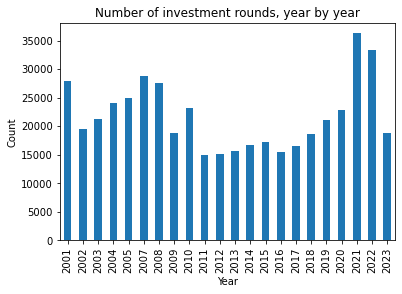

In [6]:
import matplotlib.pyplot as plt
investment_df["investment_year"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of investment rounds, year by year")
plt.xlabel("Year")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

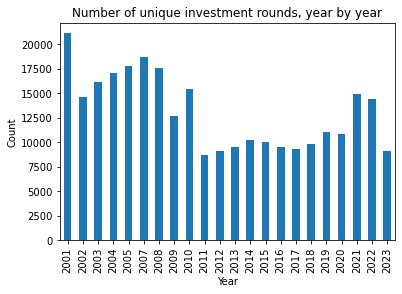

In [7]:
unique_round_df = investment_df.drop_duplicates(subset=investment_df.columns.difference(['Unnamed: 0','Firm Investor Name','Fund Investor Name']))
unique_round_df["investment_year"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of unique investment rounds, year by year")
plt.xlabel("Year")
plt.ylabel("Count")

In [27]:
print("Total number of investment rounds in USA between 2001-2023: ", len(unique_round_df))

Total number of investment rounds in USA between 2001-2023:  287935


In [30]:
print("Total number of investment firms in USA between 2001-2023: ", investment_df["Firm Investor Name"].nunique())

Total number of investment firms in USA between 2001-2023:  19285


In [29]:
print("Total number of funds in USA between 2001-2023: ", investment_df["Fund Investor Name"].nunique())

Total number of funds in USA between 2001-2023:  35514


In [38]:
print("Total investment amound raised -", round(unique_round_df['Deal Rank Value\n(USD, Millions)'].sum()/1000,2), "billion")

Total investment amound raised - 9289.41 billion


Text(0, 0.5, 'Investment Amount (USD, Billions)')

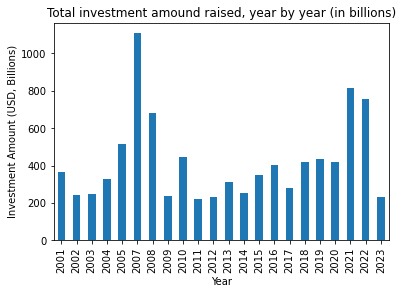

In [11]:
(unique_round_df.groupby("investment_year")['Deal Rank Value\n(USD, Millions)'].sum()/1000).plot(kind="bar")
plt.title("Total investment amound raised, year by year (in billions)")
plt.xlabel("Year")
plt.ylabel("Investment Amount (USD, Billions)")
# plt.ticklabel_format(useOffset÷=False)
# plt.show()

Text(0, 0.5, 'Investment Amount (USD, Billions)')

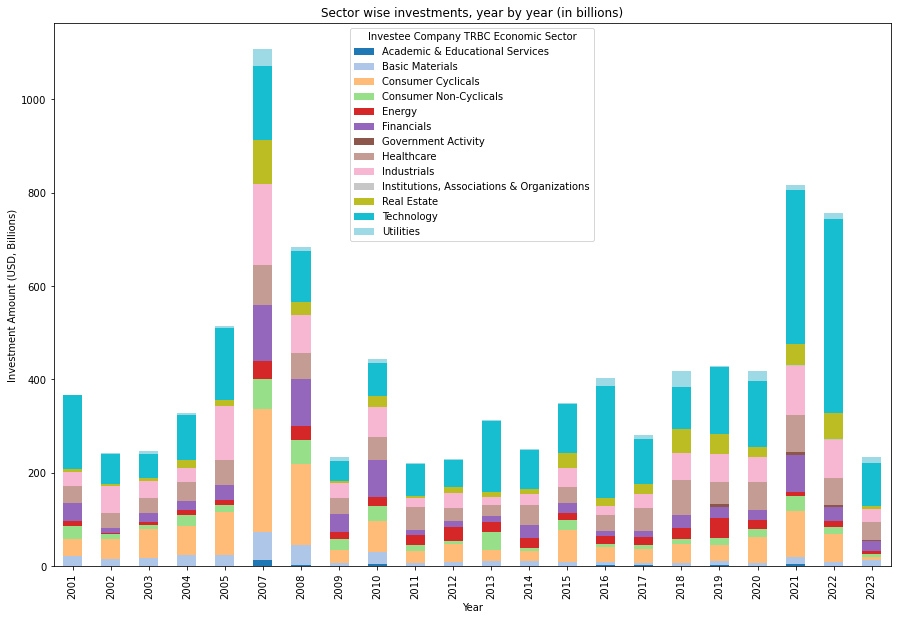

In [12]:
(unique_round_df.groupby(["investment_year","Investee Company TRBC Economic Sector"])['Deal Rank Value\n(USD, Millions)'].sum()/1000).unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Sector wise investments, year by year (in billions)")
plt.xlabel("Year")
plt.ylabel("Investment Amount (USD, Billions)")

Text(0, 0.5, 'Investment Amount (USD, Millions)')

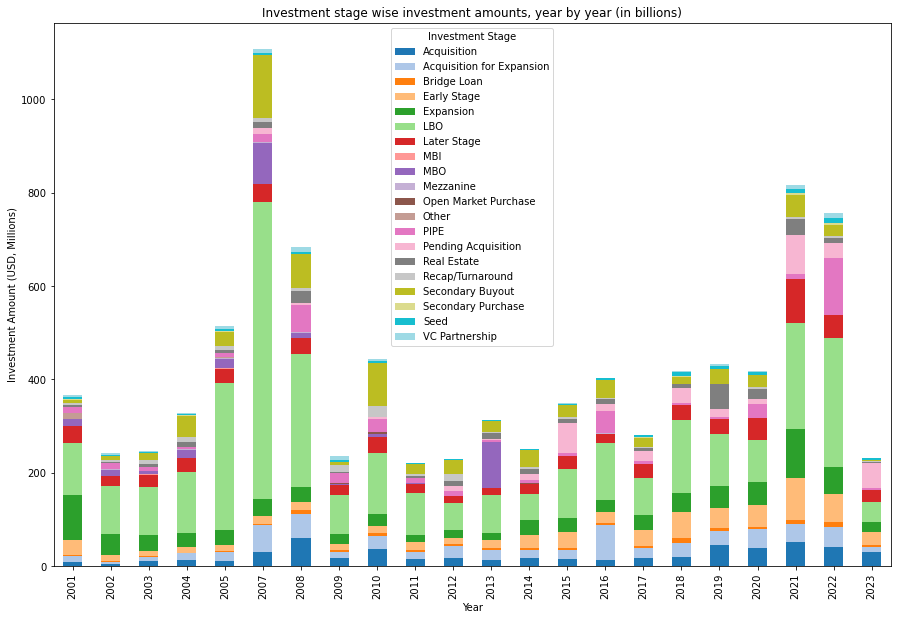

In [13]:
(unique_round_df.groupby(["investment_year","Investment Stage"])['Deal Rank Value\n(USD, Millions)'].sum()/1000).unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Investment stage wise investment amounts, year by year (in billions)")
plt.xlabel("Year")
plt.ylabel("Investment Amount (USD, Millions)")

Text(0, 0.5, 'Count')

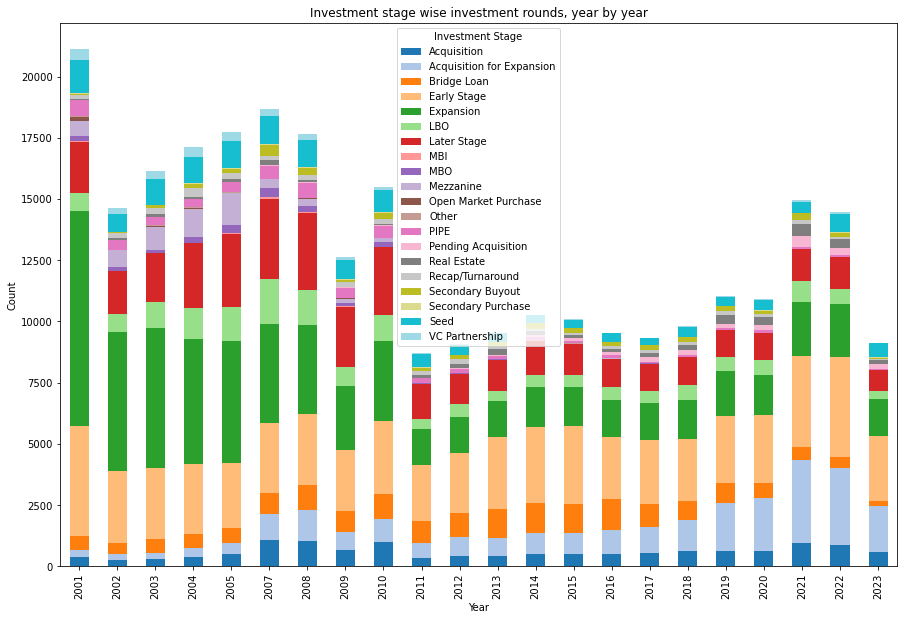

In [14]:
(unique_round_df.groupby(["investment_year","Investment Stage"])['Deal Rank Value\n(USD, Millions)'].count()).unstack().plot(kind="bar",stacked=True,figsize=(15,10),colormap="tab20")
plt.title("Investment stage wise investment rounds, year by year")
plt.xlabel("Year")
plt.ylabel("Count")

In [16]:
df = unique_round_df.groupby('Firm Investor Name')['Deal Rank Value\n(USD, Millions)'].sum().reset_index().sort_values(by="Deal Rank Value\n(USD, Millions)", ascending=False)

In [48]:
421626.7163/df2['Deal Rank Value\n(USD, Millions)'].sum()*100

16.58854685750906

In [49]:
(16.58854685750906/100)*df2['Deal Rank Value\n(USD, Millions)'].sum()

421626.71630000003

Text(0.5, 1.0, 'Top 20 Investors and their investment percentages (overall)')

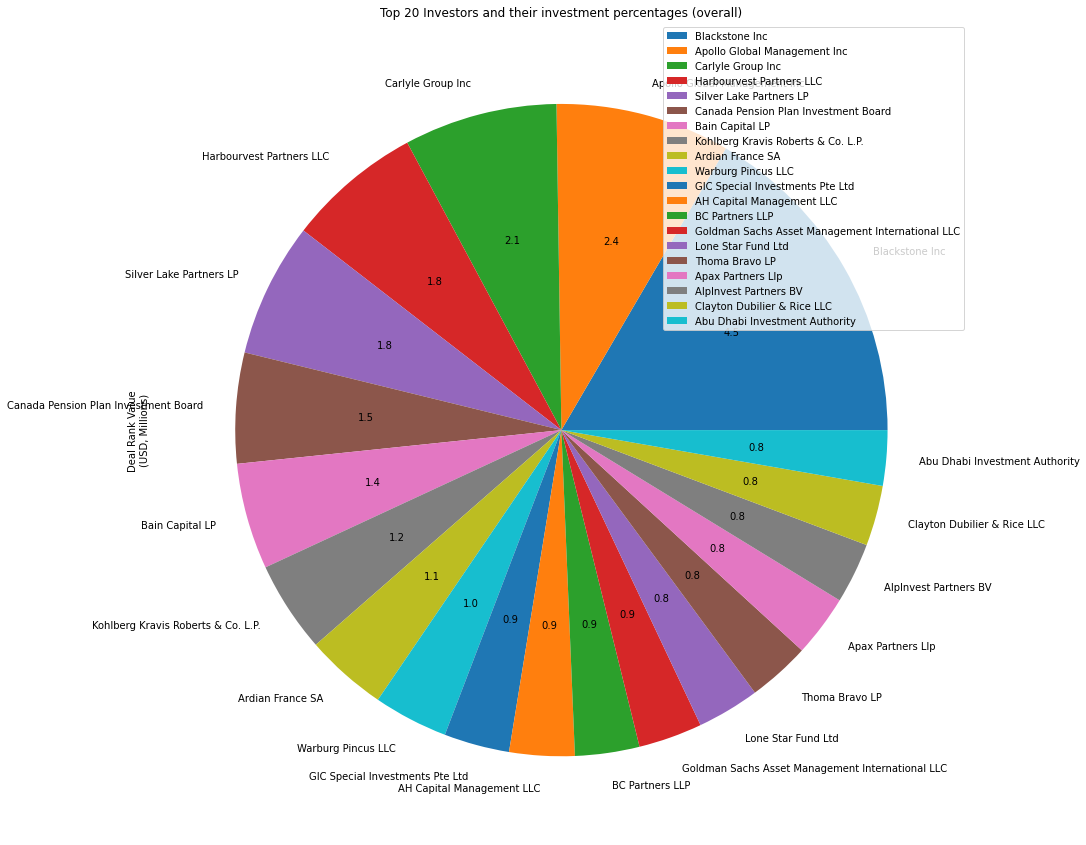

In [55]:
#the top 5
df2 = df[1:21].copy()

# #others
# new_row = pd.DataFrame(data = {
#     'Firm Investor Name' : ['others'],
#     'Deal Rank Value\n(USD, Millions)' : [df['Deal Rank Value\n(USD, Millions)'][50:].sum()]
# })

# #combining top 5 with others
# df2 = pd.concat([df2, new_row])

#plotting -- for comparison left all countries and right 
#the others combined
# fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
# df.plot(kind = 'pie', y = 'Deal Rank Value\n(USD, Millions)', labels = df['Firm Investor Name'], ax = axes[0])
df2.plot(kind = 'pie', y = 'Deal Rank Value\n(USD, Millions)', labels = df2['Firm Investor Name'], autopct=lambda x: '{:.01f}'.format(((x/100)*df2['Deal Rank Value\n(USD, Millions)'].sum())/(df['Deal Rank Value\n(USD, Millions)'].sum())*100),figsize=(15,15))
plt.title("Top 20 Investors and their investment percentages (overall)")
# axes[0].set_title('all investors')
# axes[0].set_title('top 20')
# plt.show

In [95]:
temp = pd.DataFrame(unique_round_df.groupby(["investment_year",'Firm Investor Name'])['Deal Rank Value\n(USD, Millions)'].sum().reset_index())

In [114]:
temp_largest = temp.groupby(["investment_year"])['Deal Rank Value\n(USD, Millions)'].nlargest(5).reset_index()
temp_largest = pd.merge(temp_largest,temp["Firm Investor Name"], left_on="level_1", right_on=temp.index, how="left")

In [121]:
temp_largest

,investment_year,level_1,"Deal Rank Value\n(USD, Millions)",Firm Investor Name
0,2001,2863,54374.7947,Undisclosed Firm
1,2001,226,14064.1916,Apax Partners Llp
2,2001,2365,5603.0000,Reed Elsevier Inc
3,2001,1307,5323.9660,Goldman Sachs Asset Management International LLC
4,2001,2353,4541.4920,Rbef Ltd
...,...,...,...,...
105,2023,60644,13960.0000,Silver Lake Partners LP
106,2023,58754,12978.3000,Canada Pension Plan Investment Board
107,2023,60902,12454.6966,Undisclosed Firm
108,2023,58014,9995.4160,AH Capital Management LLC


In [158]:
investment_df.drop_duplicates(subset=["Firm Investor Name","Investee Company Name"]).groupby("Firm Investor Name").count()["Investee Company Name"].sort_values(ascending=False).head(50)

Firm Investor Name
Undisclosed Firm                                    44226
Business Development Bank of Canada                  3928
Y Combinator Management LLC                           909
Intel Capital Corp                                    889
New Enterprise Associates Inc                         888
3i Group PLC                                          777
Goldman Sachs Asset Management International LLC      771
Sequoia Capital Operations LLC                        754
AH Capital Management LLC                             638
Kleiner Perkins Caufield & Byers LLC                  582
Accel Partners & Co Inc                               579
Carlyle Group Inc                                     578
Deer Management Co LLC                                551
Draper Fisher Jurvetson International Inc             533
Warburg Pincus LLC                                    531
Insight Venture Management LLC                        522
Google Ventures                                      

In [160]:
investment_df.drop_duplicates(subset=["Fund Investor Name","Investee Company Name"]).groupby("Fund Investor Name").count()["Investee Company Name"].sort_values(ascending=False).head(50)

Fund Investor Name
Undisclosed Fund                                          44165
Growth & Transition Capital                                3688
Y Combinator Management LLC - Unspecified Fund              872
Intel Capital - Unspecified Fund                            707
Sequoia Capital - Unspecified Fund                          591
New Enterprise Associates Inc - Unspecified Fund            585
Goldman Sachs Asset Management  - Unspecified Fund          568
AH Capital Management LLC - Unspecified Fund                538
Kleiner Perkins Caufield & Byers - Unspecified Fund         533
Accel Partners & Co Inc - Unspecified Fund                  480
Bessemer Venture Partners - Unspecified Fund                479
TechStars - Unspecified Fund                                434
Khosla Ventures - Unspecified Fund                          412
Insight Venture Management LLC - Unspecified Fund           412
SV Angel - Unspecified Fund                                 401
General Catalyst Part

## Company statistics

In [57]:
companies_df = pd.read_csv("unique_companies_processed_2000_2023.csv")

In [138]:
companies_df

,Unnamed: 0,Company Name,Company Nation,Investee Company TRBC Economic Sector,"Avg Equity Per Deal in Search Range\n(USD, Millions)","Avg Equity Per Firm in Search Range\n(USD, Millions)","Avg Equity Per Fund in Search Range\n(USD, Millions)","Sum of Equity Invested in Search Range\n(USD, Millions)",Investee Primary SIC\n('|'),Investee Company Primary VE Industry Sub-Group 2\n('|'),...,Fund Investor BEID,"Deal Value\n(USD, Millions)","Deal Value\n(USD, Millions).1","Deal Rank Value\n(USD, Millions)",Investee Company Website\n('|'),Investee Company Status\n('|'),Investee Company Founded Date\n('|'),Investee Company Long Business Description\n('|'),Investee Company Short Business Description\n('|'),Investee Company Alias Name\n('|')
0,0,Commsignia Ltd,United States,Technology,15.0,2.14,2.14,15.0,Prepackaged Software,Computer Software,...,7.0,0.00,0.00,15.00,https://www.commsignia.com/,Active,2012-01-01 00:00:00,Commsignia specializes in Connected Car / V2X ...,Specializes in Connected Car / V2X hardware an...,NaN
1,1,Fencing Supply Group,United States,Consumer Cyclicals,0.0,0.00,0.00,0.0,"Construction materials, nec",Construction,...,1.0,0.00,0.00,0.00,https://fencingsupplygroup.com,Active,2021-01-01 00:00:00,"Fencing Supply Group, based in Houston, is com...",Comprised of distributors of fencing supplies.,FSG
2,2,Stx Beef Co Ltd,United States,Consumer Non-Cyclicals,0.0,0.00,0.00,0.0,Meats and meat products,Food and Beverage,...,1.0,0.00,0.00,0.00,https://www.stxbeef.com/,Active,1949-01-01 00:00:00,STX Beef is a beef meat supplier based in Texa...,Supplies Beef meat in Texas.,NaN
3,3,AST Corp,United States,Industrials,0.0,0.00,0.00,0.0,"Business services, nec",Internet Ecommerce,...,1.0,0.00,0.00,0.00,https://www.astcorporation.com,Active,2010-07-23 00:00:00,Ast Corp is a United States-based company. The...,Offers a full-service enterprise systems integ...,Applications Software Technology LLC
4,4,Kewl Technologies Inc,United States,Technology,0.0,0.00,0.00,0.0,Prepackaged Software,Computer Software,...,2.0,0.00,0.00,0.00,https://kewl.io/,Active,2022-01-01 00:00:00,"Kewl is a US based company, founded in 2022. T...","Enables players to explore, collect and sell u...",KEWL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68980,137495,Anteon International Corp,United States,Technology,0.0,0.00,0.00,0.0,Computer facilities management services,Computer Software,...,1.0,0.00,0.00,0.00,www.anteon.com,Active,1976-01-01 00:00:00,Anteon International Corporation (Anteon) is a...,"Provides information technology, e-business, a...",NaN
68981,137499,MPC Computers LLC,United States,Consumer Cyclicals,0.0,0.00,0.00,0.0,Electronic computers,Computers Hardware,...,1.0,70.00,70.00,70.00,NaN,Bankruptcy - Chapter 7,2001-01-01 00:00:00,"MPC Computers LLC provides personal computers,...","MPC Computers LLC provides personal computers,...",MicronPC LLC
68982,137511,Hydrogen Burner Technology Inc,United States,Industrials,0.0,0.00,0.00,0.0,Industrial gases,"Energy, Alternative",...,1.0,0.00,0.00,4.55,www.hydrogenburner.com,Active,1992-01-01 00:00:00,"Hydrogen Burner Technology, Inc. (HBTI) is a d...",Fuel cell applications and Underoxidized Burne...,NaN
68983,137532,Armed Forces Communications Inc,United States,Consumer Cyclicals,0.0,0.00,0.00,0.0,Advertising agencies,Business Services,...,1.0,28.00,28.00,28.00,www.armedforces.com,LBO,NaN,The Company provides media placement and promo...,The Company provides media placement services ...,"Armed Forces Communications, Inc."


In [65]:
print("Average Long description length (characters): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.len().mean())
print("Maximum Long description length (characters): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.len().max())
print("Minimum Long description length (characters): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.len().min())
print("Standard Deviation Long description length (characters): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.len().std())
print("\n")
print("Average Long description length (words): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len).mean())
print("Maximum Long description length (words): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len).max())
print("Minimum Long description length (words): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len).min())
print("Standard Deviation Long description length (words): ", companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len).std())

Average Long description length (characters):  464.0425564721301
Maximum Long description length (characters):  2834
Minimum Long description length (characters):  1
Standard Deviation Long description length (characters):  268.077002005558



Average Long description length (words):  63.50054737491327
Maximum Long description length (words):  469
Minimum Long description length (words):  1
Standard Deviation Long description length (words):  36.67351001550955


In [75]:
print("Average Short description length: ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.len().mean())
print("Maximum Short description length: ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.len().max())
print("Minimum Short description length: ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.len().min())
print("Standard Deviation Short description length: ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.len().std())
print("\n")
print("Average Short description length (words): ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len).mean())
print("Maximum Short description length (words): ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len).max())
print("Minimum Short description length (words): ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len).min())
print("Standard Deviation Short description length (words): ", companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len).std())

Average Short description length:  55.88161808447353
Maximum Short description length:  75
Minimum Short description length:  1
Standard Deviation Short description length:  13.008765696989949


Average Short description length (words):  7.302079043304504
Maximum Short description length (words):  15
Minimum Short description length (words):  1
Standard Deviation Short description length (words):  2.0129451804803384


Text(0, 0.5, 'Word count')

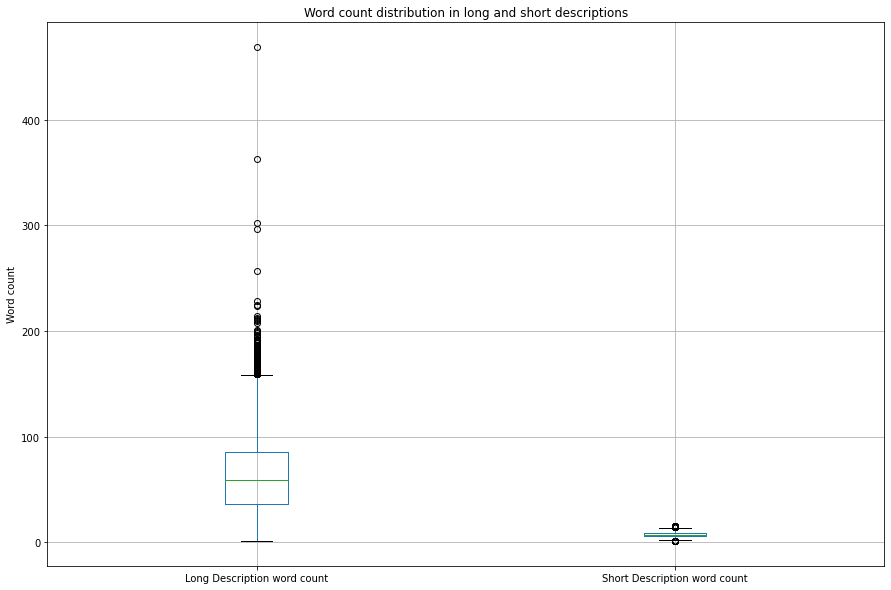

In [146]:
pd.DataFrame({"Long Description word count":companies_df["Investee Company Long Business Description\n('|')"].dropna().str.split().apply(len),"Short Description word count":companies_df["Investee Company Short Business Description\n('|')"].dropna().str.split().apply(len)}).boxplot(figsize=(15,10))
plt.title("Word count distribution in long and short descriptions")
plt.ylabel("Word count")

In [161]:
companies_df.isna().sum()

Unnamed: 0                                                     0
Company Name                                                   0
Company Nation                                                 0
Investee Company TRBC Economic Sector                         15
Avg Equity Per Deal in Search Range\n(USD, Millions)           0
Avg Equity Per Firm in Search Range\n(USD, Millions)           0
Avg Equity Per Fund in Search Range\n(USD, Millions)           0
Sum of Equity Invested in Search Range\n(USD, Millions)        0
Investee Primary SIC\n('|')                                 2175
Investee Company Primary VE Industry Sub-Group 2\n('|')        1
Investee Company Primary VEIC\n('|')                           1
Investee Company TRBC Industry Group\n('|')                   14
Investee Company TRBC Industry\n('|')                         14
Investee Company TRBC Business Sector\n('|')                  14
Investee Company TRBC Activity\n('|')                         14
Investee Company NAICS 20

In [168]:
companies_df.describe()

,Unnamed: 0,"Avg Equity Per Deal in Search Range\n(USD, Millions)","Avg Equity Per Firm in Search Range\n(USD, Millions)","Avg Equity Per Fund in Search Range\n(USD, Millions)","Sum of Equity Invested in Search Range\n(USD, Millions)",year,Investment Round Permid,Firm Investor BEID,Fund Investor BEID,"Deal Value\n(USD, Millions)","Deal Value\n(USD, Millions).1","Deal Rank Value\n(USD, Millions)"
count,68985.000000,68985.000000,68985.000000,68985.000000,68985.000000,68985.000000,51264.000000,51264.000000,51264.000000,51264.000000,51264.000000,51264.000000
mean,62571.188258,18.965735,11.586020,11.380785,20.967792,2015.302486,1.158591,2.361599,2.419300,28.057253,28.057253,43.196657
std,36608.774836,210.781896,188.179388,187.456108,217.271798,6.798046,0.534488,2.223185,2.285403,440.763945,440.763945,452.296605
min,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,35699.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,63491.000000,0.500000,0.300000,0.300000,0.500000,2017.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.550000
75%,83506.000000,7.000000,3.160000,3.040000,8.000000,2021.000000,1.000000,3.000000,3.000000,0.000000,0.000000,10.500000
max,137534.000000,37605.000000,37605.000000,37605.000000,37605.000000,2023.000000,36.000000,30.000000,30.000000,38656.000000,38656.000000,38656.000000


In [58]:
companies_df["founded_year"] = pd.to_datetime(companies_df["Investee Company Founded Date\n('|')"],errors="coerce").dt.year

/Users/parthmaheshwari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/08/1896' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/parthmaheshwari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '28/03/1898' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/parthmaheshwari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/11/1894' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/parthmaheshwari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.p

Text(0, 0.5, 'Count')

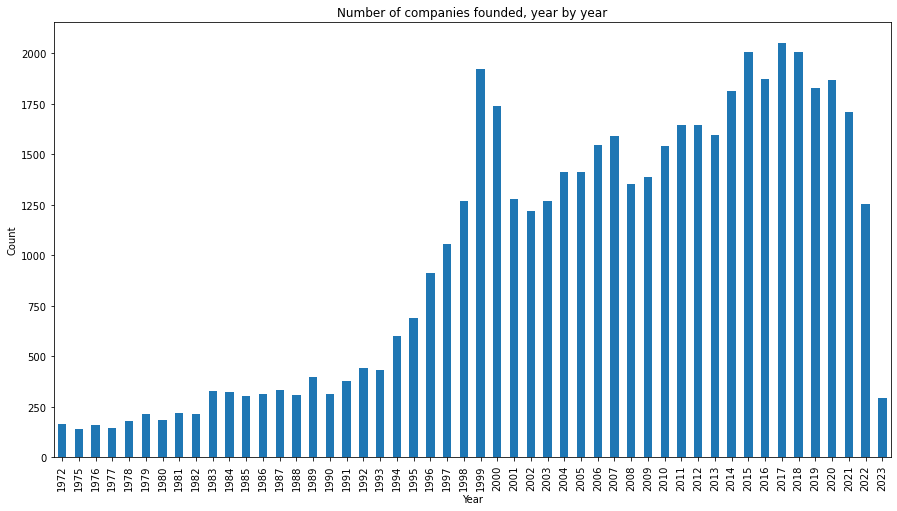

In [64]:
companies_df["founded_year"].dropna().astype(int).value_counts().head(50).sort_index().plot(kind="bar",figsize=(15,8))
plt.title("Number of companies founded, year by year")
plt.xlabel("Year")
plt.ylabel("Count")

In [198]:
companies_df["founded_year"].isna().sum()

16521

### SIC Classification

942


Text(0.5, 1.0, 'Primary SIC classification')

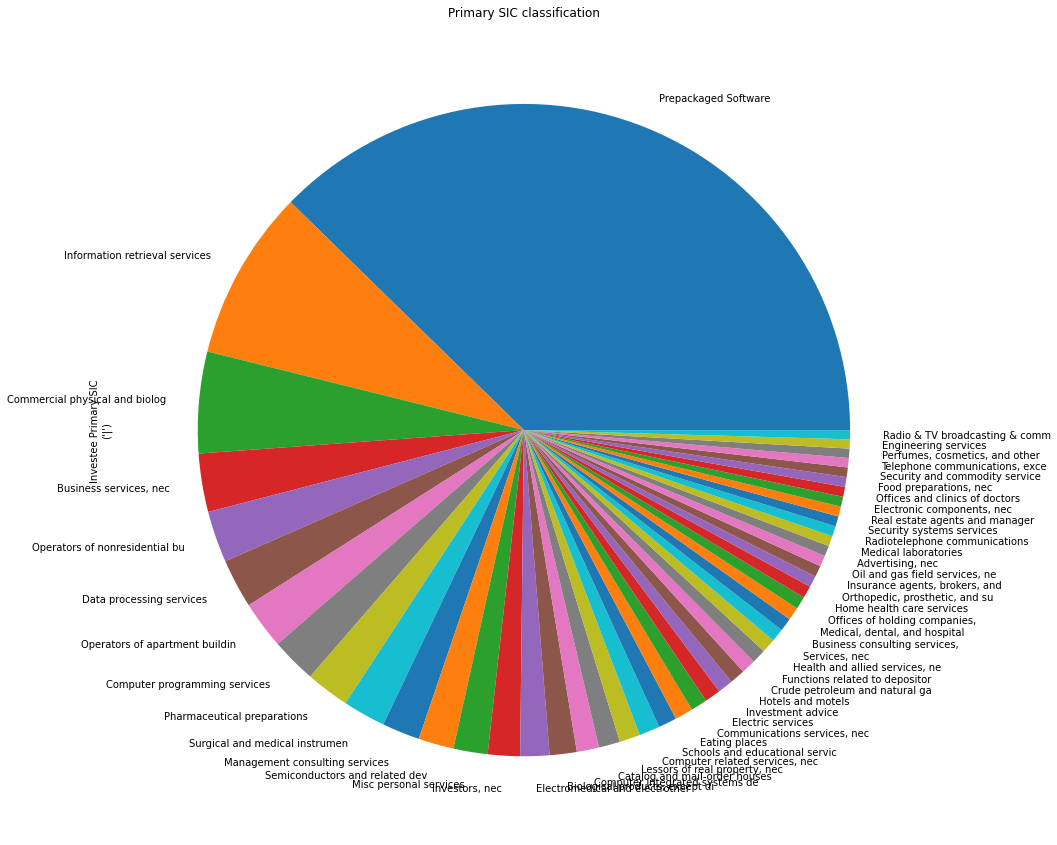

In [110]:
print(companies_df["Investee Primary SIC\n('|')"].nunique())
companies_df["Investee Primary SIC\n('|')"].str.slice(0, 30).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("Primary SIC classification")

942


Text(0.5, 1.0, 'SIC classification')

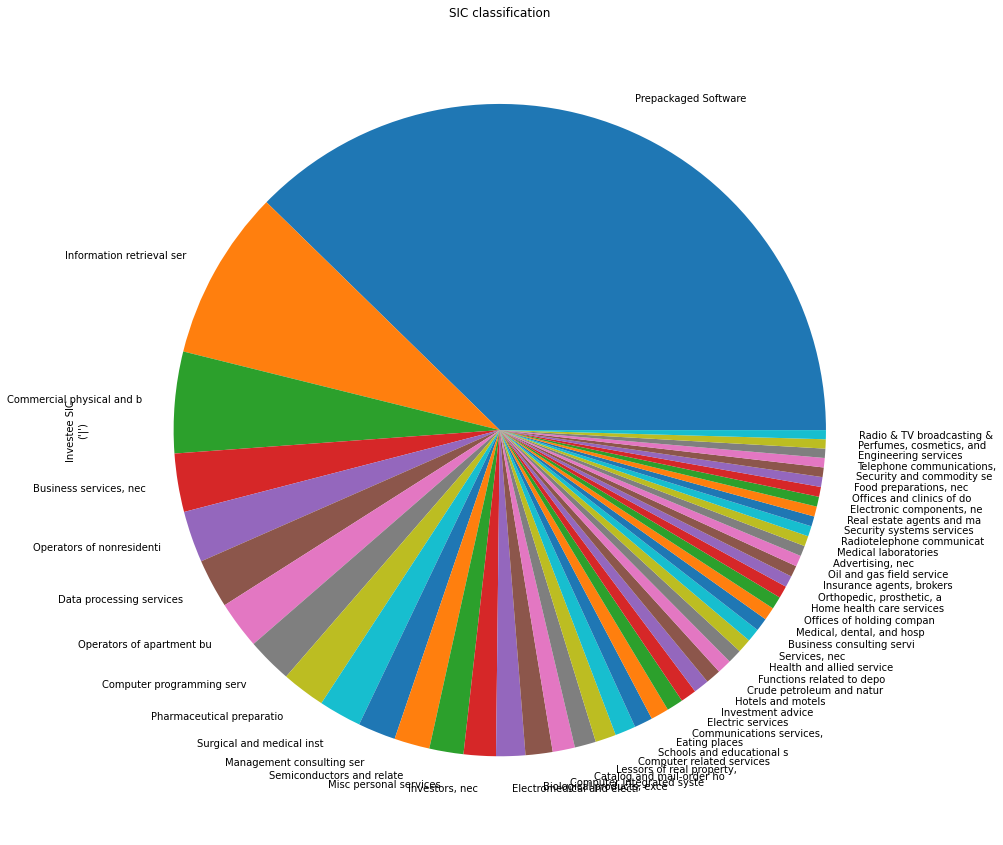

In [98]:
print(companies_df["Investee SIC\n('|')"].nunique())
companies_df["Investee SIC\n('|')"].str.slice(0, 25).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("SIC classification")

### VEIC Classification

569


Text(0.5, 1.0, 'Primary Venture Economics(VE) Industry Codes')

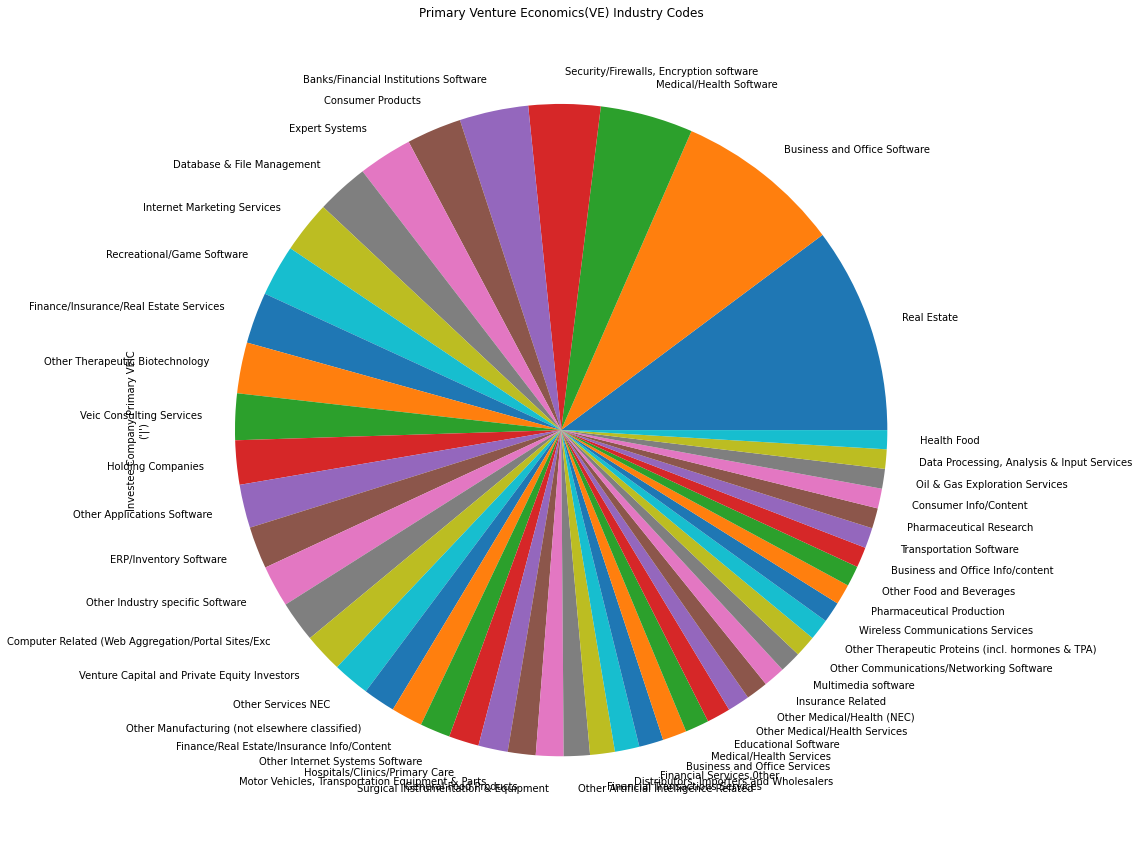

In [114]:
print(companies_df["Investee Company Primary VEIC\n('|')"].nunique())
companies_df["Investee Company Primary VEIC\n('|')"].str.slice(0, 50).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("Primary Venture Economics(VE) Industry Codes")

68


Text(0.5, 1.0, 'Primary Venture Economics(VE) Industry Sub-Group 2')

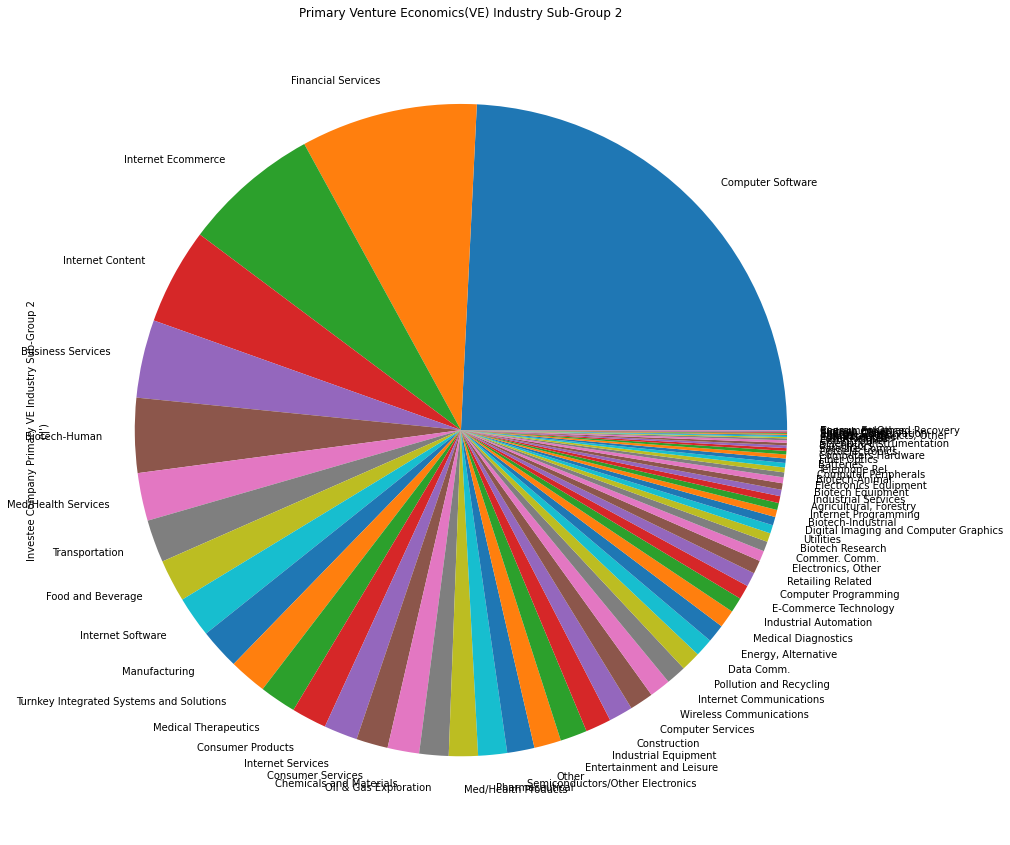

In [113]:
print(companies_df["Investee Company Primary VE Industry Sub-Group 2\n('|')"].nunique())
companies_df["Investee Company Primary VE Industry Sub-Group 2\n('|')"].value_counts().plot(kind="pie",figsize=(15,15))
plt.title("Primary Venture Economics(VE) Industry Sub-Group 2")

569


Text(0.5, 1.0, 'VE Primary Industry Sub-Group 3')

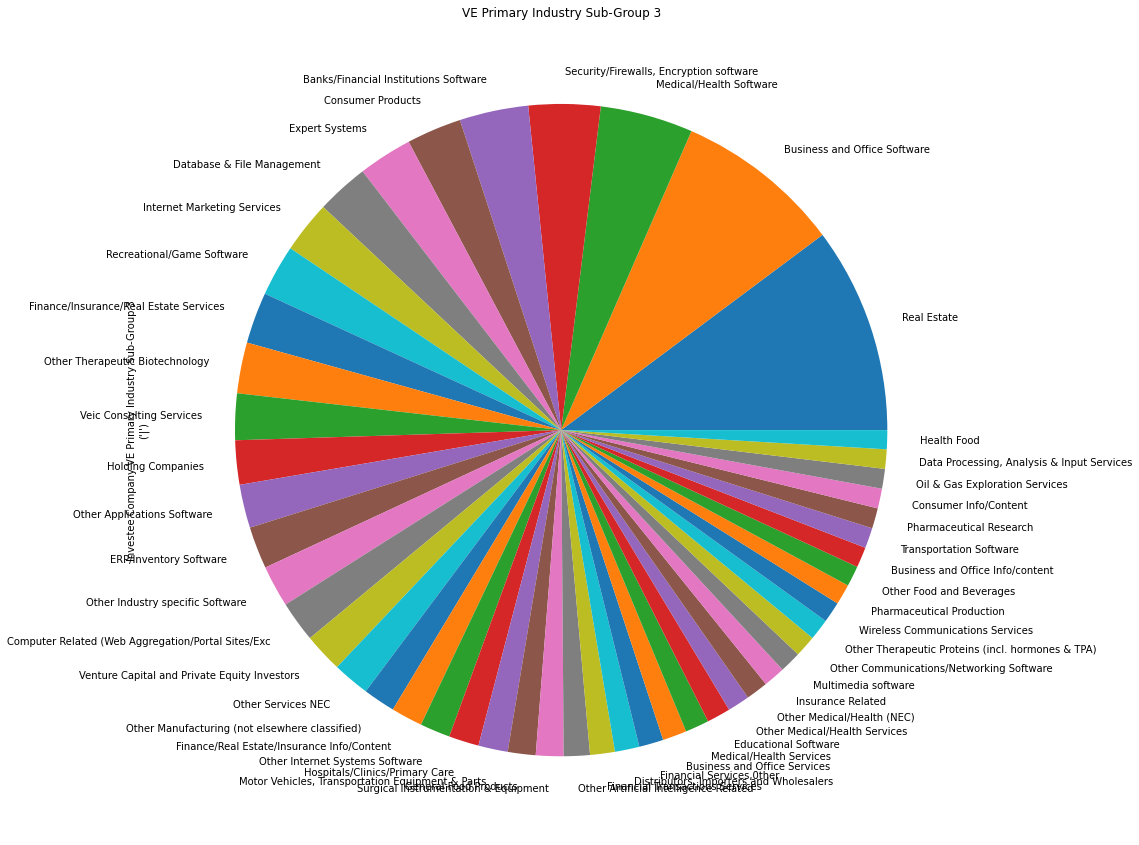

In [120]:
print(companies_df["Investee Company VE Primary Industry Sub-Group 3\n('|')"].nunique())
companies_df["Investee Company VE Primary Industry Sub-Group 3\n('|')"].str.slice(0, 50).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("VE Primary Industry Sub-Group 3")

3


Text(0.5, 1.0, 'VE Industry Class')

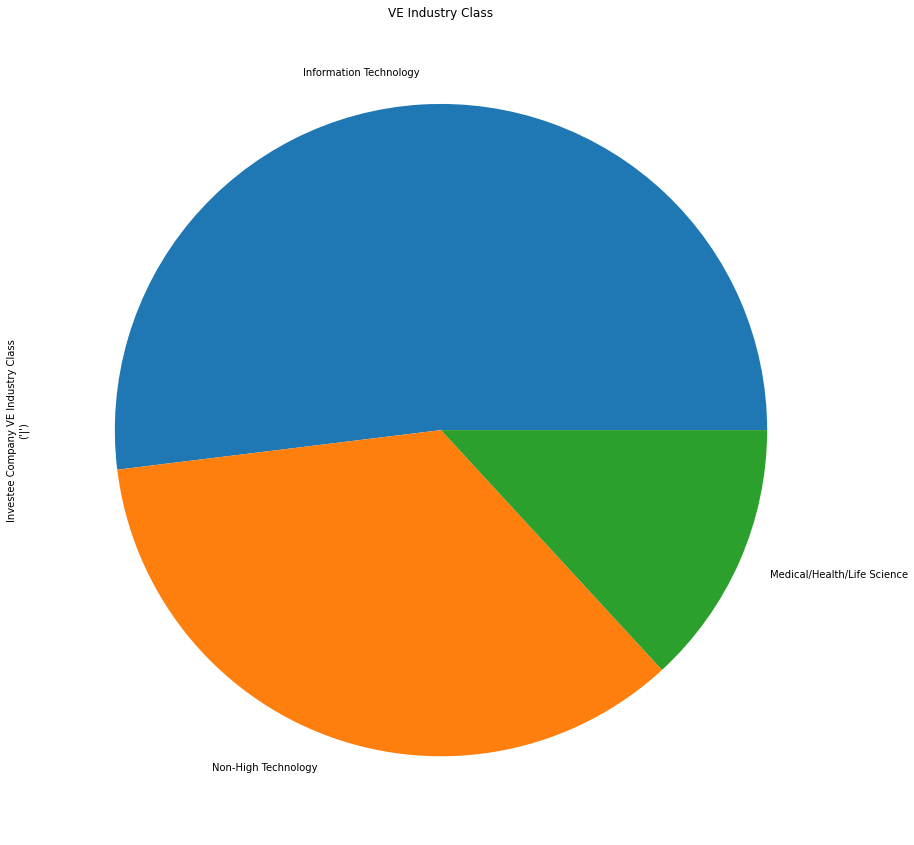

In [121]:
print(companies_df["Investee Company VE Industry Class\n('|')"].nunique())
companies_df["Investee Company VE Industry Class\n('|')"].value_counts().plot(kind="pie",figsize=(15,15))
plt.title("VE Industry Class")

68


Text(0.5, 1.0, 'VE Industry Sub-Group 2')

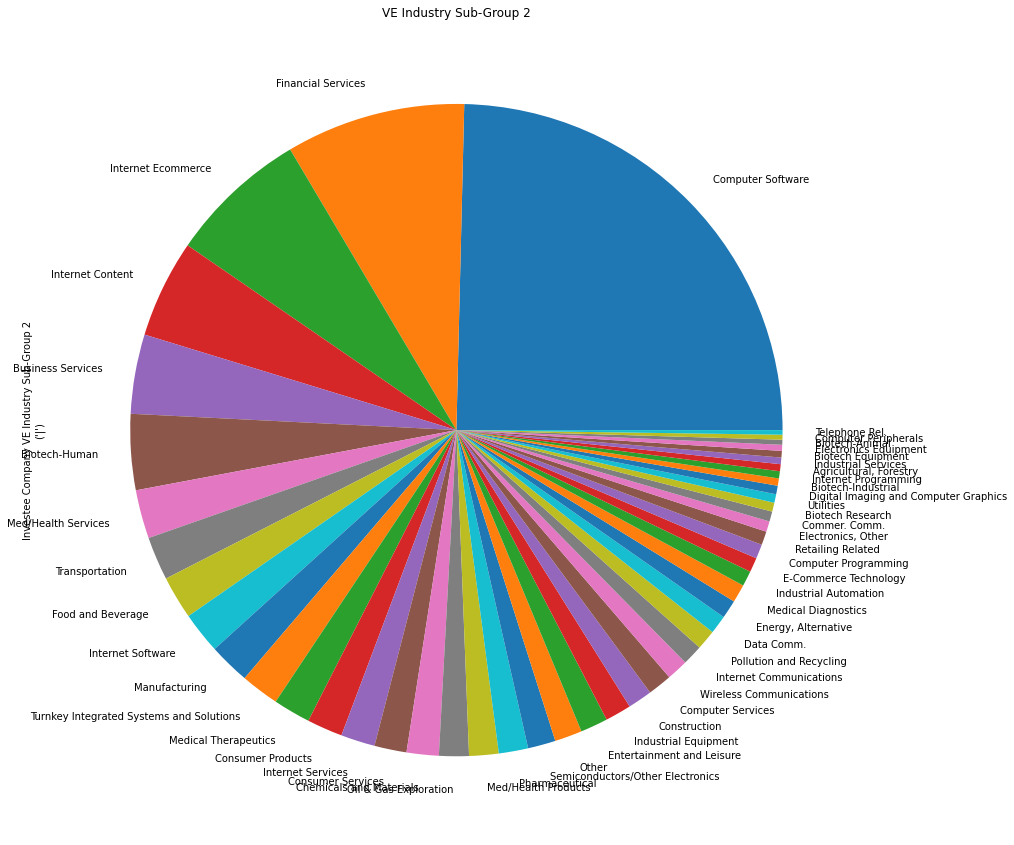

In [91]:
print(companies_df["Investee Company VE Industry Sub-Group 2\n('|')"].nunique())
companies_df["Investee Company VE Industry Sub-Group 2\n('|')"].value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("VE Industry Sub-Group 2")

### TRBC Industry classification

62


Text(0.5, 1.0, 'TRBC Industry Groups')

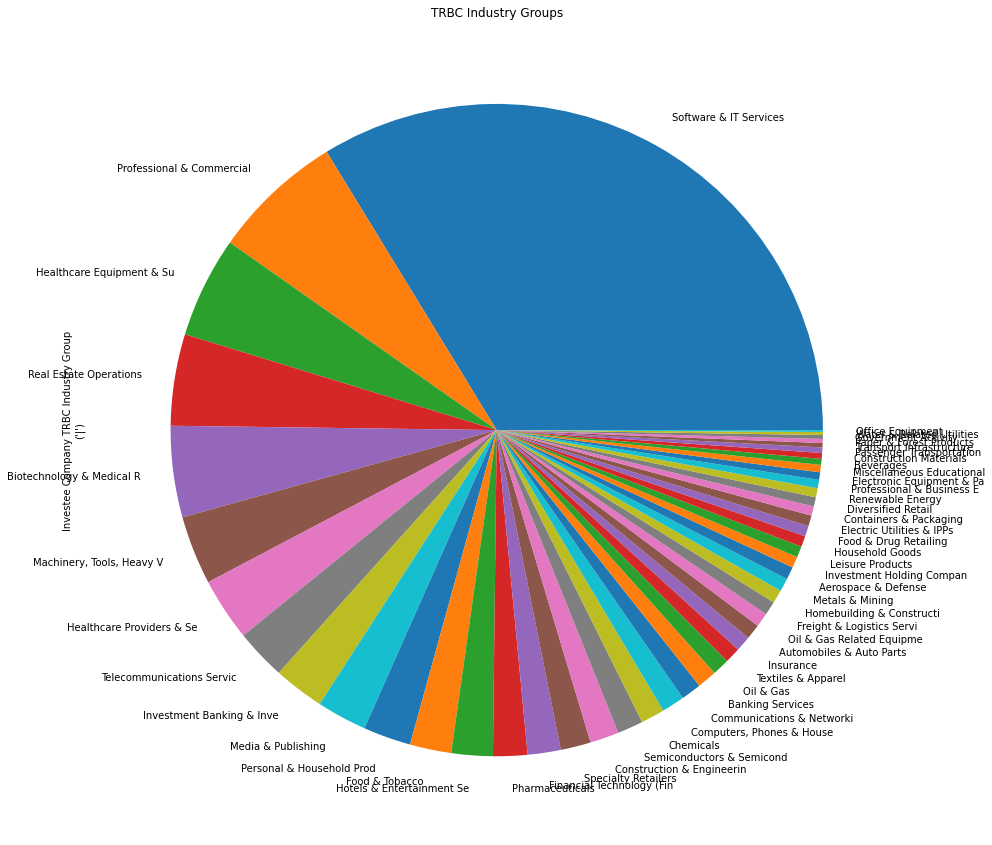

In [116]:
print(companies_df["Investee Company TRBC Industry Group\n('|')"].nunique())
companies_df["Investee Company TRBC Industry Group\n('|')"].str.slice(0, 25).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("TRBC Industry Groups")

152


Text(0.5, 1.0, 'TRBC Industry')

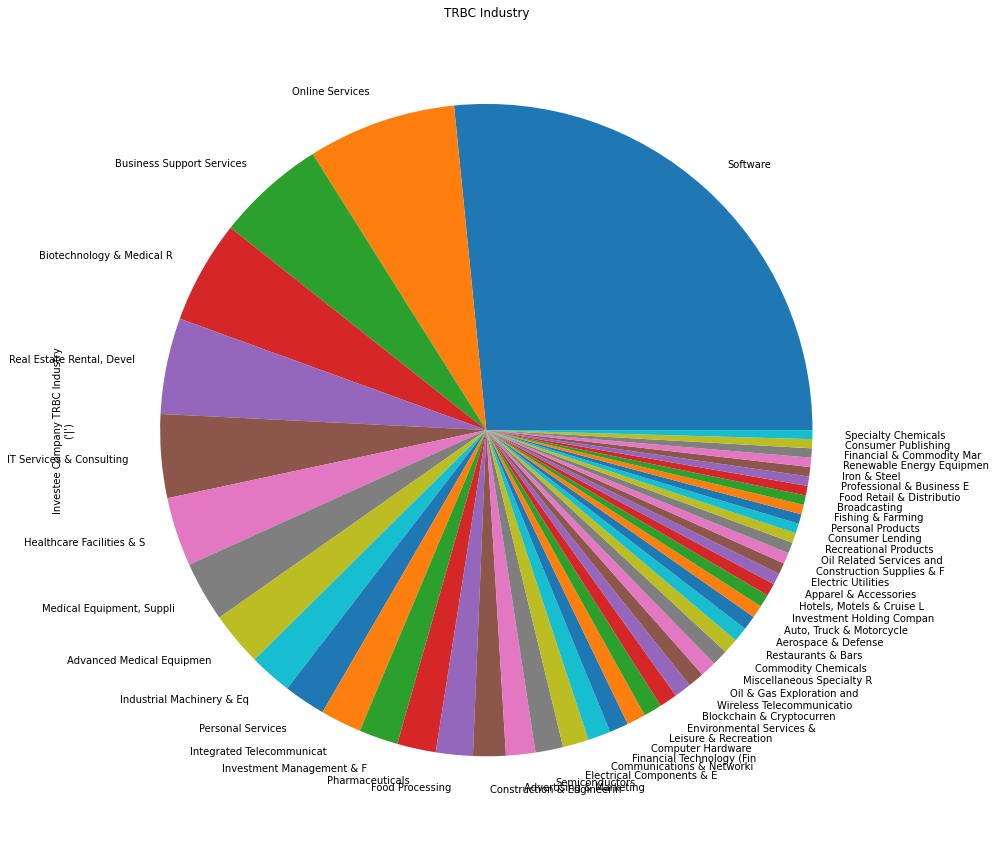

In [117]:
print(companies_df["Investee Company TRBC Industry\n('|')"].nunique())
companies_df["Investee Company TRBC Industry\n('|')"].str.slice(0, 25).value_counts().head(50).plot(kind="pie",figsize=(15,15))
plt.title("TRBC Industry")

33


Text(0.5, 1.0, 'TRBC Business Sectors')

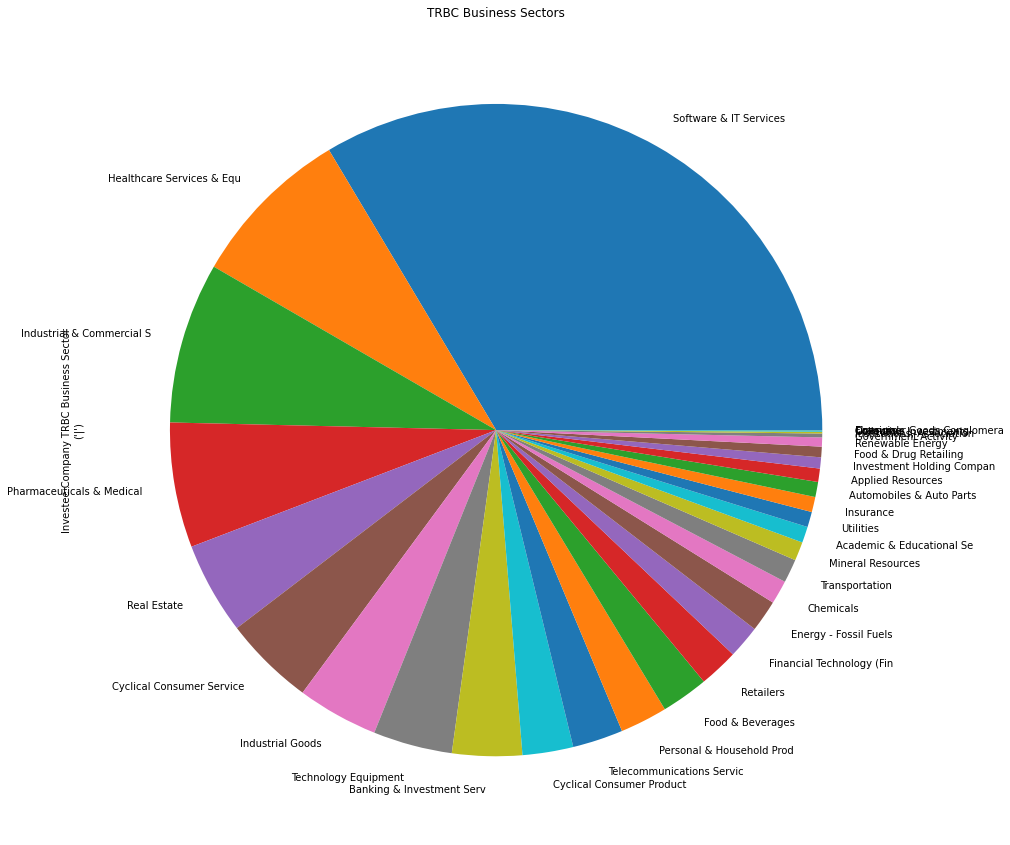

In [118]:
print(companies_df["Investee Company TRBC Business Sector\n('|')"].nunique())
companies_df["Investee Company TRBC Business Sector\n('|')"].str.slice(0, 25).value_counts().plot(kind="pie",figsize=(15,15))
plt.title("TRBC Business Sectors")

### NAICS Classification

962


Text(0.5, 1.0, 'NAICS 2022 classification')

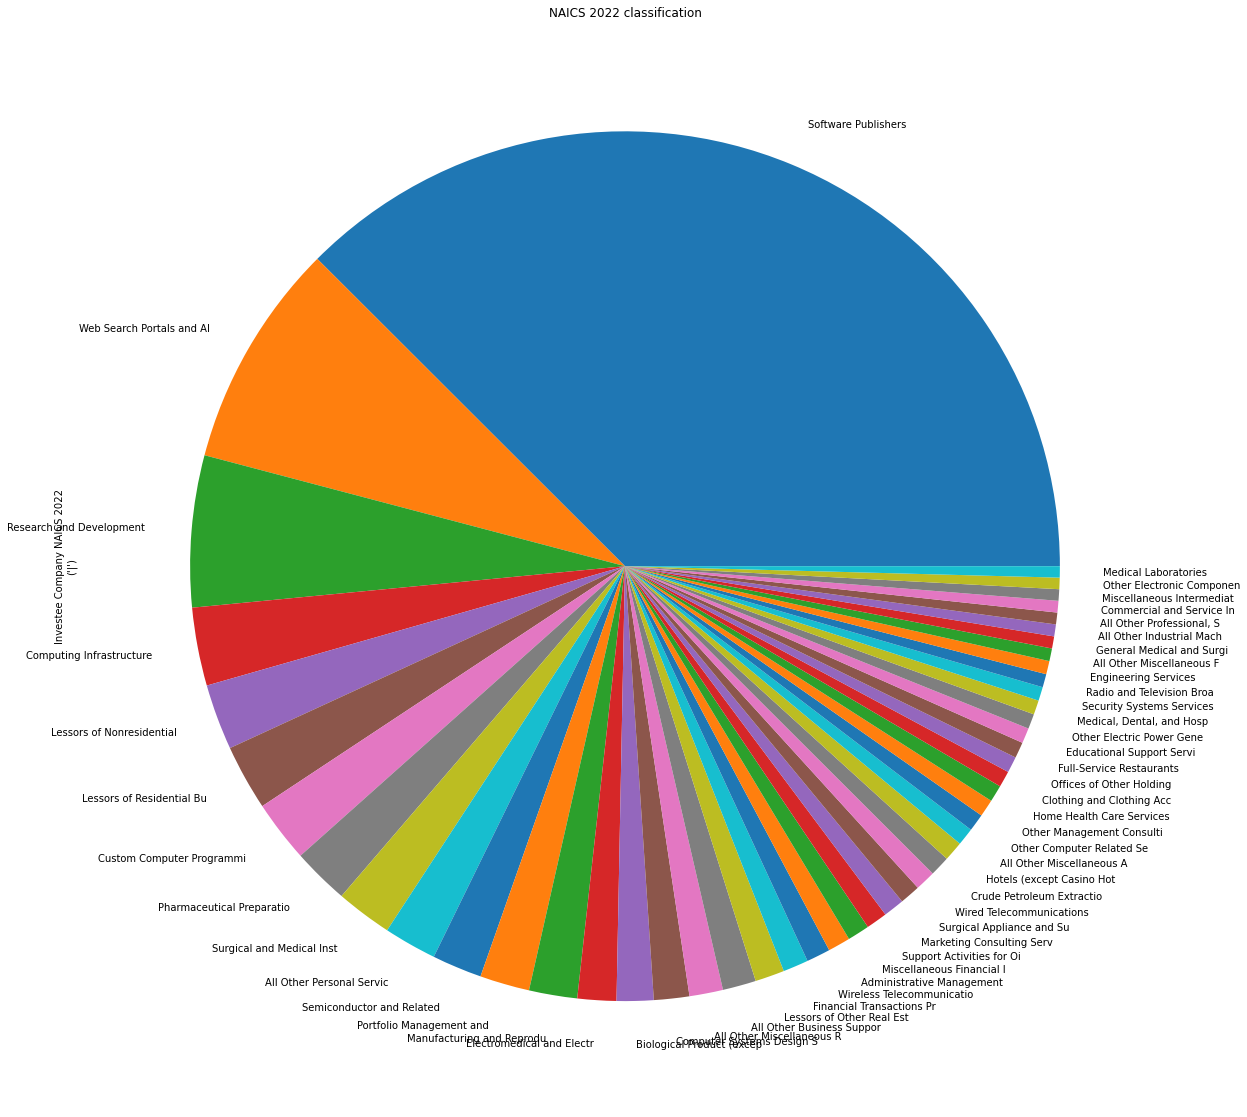

In [97]:
print(companies_df["Investee Company NAICS 2022\n('|')"].nunique())
companies_df["Investee Company NAICS 2022\n('|')"].str.slice(0, 25).value_counts().head(50).plot(kind="pie",figsize=(20,20))
plt.title("NAICS 2022 classification")